# Problem set 4

In [6]:
import csv

file=open("Pediculus_project.csv")
reader = csv.DictReader(x.replace('\0', '') for x in file)

count=0
for Line in file:
    count+=1
print(count)

file.close()

1436


# Q1: Metadata 

Information about Reed Lab Louse-Human Admixture project

This data file contains specimen information used for Louse-Human Admixture project (LHA) by Reed Lab.

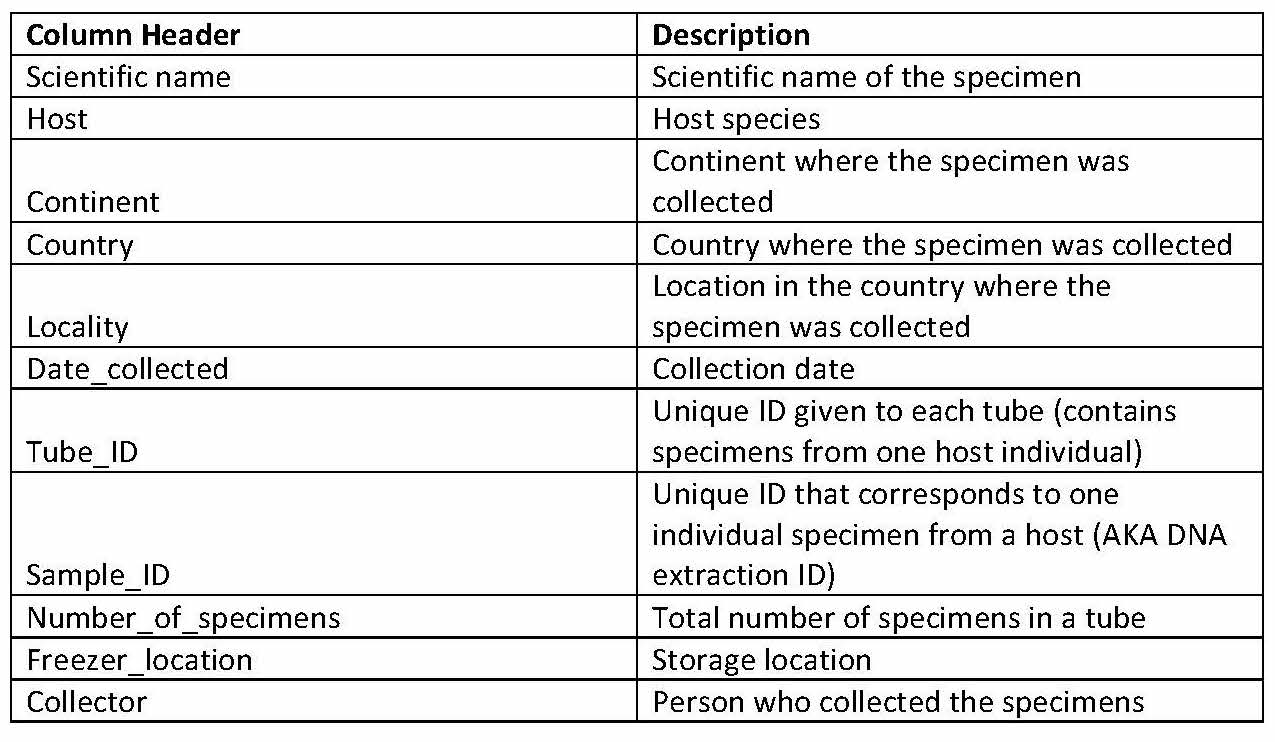

# Q2: Normalizing the data

The data file can be broken down into two tables with information regarding the Specimens in-hand and their location information. 
I applied the 1NF, 2NF and 3NF.  

The tables and columns will be as follows: 

Table1 - Specimen_information: Column1: Tube_ID (string)primary key=True, Scientific_Name (string), Host (string), No.of_specimens (integer), Freezer_location (string), Sample_ID (string), Location_ID (integer) foreign key=true

Table2 - Collection_information: Location_ID (integer) primary key=true, Tube_ID (string) foreign key=true, Continent (string), Country (string), Locality (string), Collector (string), Date_collected (DateTime)



# Q3: Code

In [23]:
from sqlalchemy import create_engine
from sqlalchemy import Table, Column, Integer, String, MetaData, ForeignKey
from sqlalchemy import DateTime, Boolean
from sqlalchemy import exists
from sqlalchemy import sql, select, join, desc
from sqlalchemy import inspect
import csv

# Create a sqlite database 
engine = create_engine('sqlite:///pediculus.sqlite')

metadata=MetaData(engine)

# Try to load specimen_info from database, if not there, create it.
try:
    specimen_info= Table('specimen_info', metadata, autoload=True)
except:
    specimen_info= Table ('specimen_info', metadata,
        Column('Tube_ID', String, primary_key=True),
        Column('Scientific_Name', String),
        Column('Host', String),
        Column('Number_of_specimens', String),
        Column('Freezer_location', String),
        Column('Sample_ID', String),
        Column('Location_ID', Integer),                          
        )

# Same for the collection_info table.
try:
    collection_info = Table ('collection_info', metadata, autoload=True)
except:      
    collection_info = Table('collection_info', metadata, 
        Column('Location_ID', Integer, autoincrement=True, primary_key=True),
        Column('Tube_ID', String, ForeignKey("specimen_info.Tube_ID")),
        Column('Continent', String),
        Column('Country', String),
        Column('Locality',String),
        Column('Collector', String),
        Column('Date_collected', String),
        )
                 
metadata.create_all(engine)

#Check whether the tables are created

inspector =inspect(engine)
print(inspector.get_table_names())

conn = engine.connect()
metadata=MetaData(engine)

#Openning the csv and adding data into columns in specimen_info table

file=open("Pediculus_project.csv")
reader = csv.DictReader(file)
for Line in reader:
    ins=specimen_info.insert().values(Tube_ID=Line['Tube_ID'],
                                 Scientific_Name=Line['\ufeffScientific_Name'],
                                 Host=Line['Host'],
                                 Number_of_specimens=Line['Number_of_specimens'],
                                 Freezer_location=Line['Freezer_location'],
                                 Sample_ID=Line['Sample_ID'],
                                     )
                        
# adding data into columns in specimen_info table

    try:    
        conn.execute(ins)
    except:
        print("Bad data in line:\n", Line)
 
    ins=collection_info.insert().values(
        Tube_ID = Line['Tube_ID'], 
        Continent = Line['Continent'],
        Country = Line['Country'], 
        Locality = Line['Locality'],
        Collector = Line['Collector'],
        Date_collected = Line['Date_collected'] 
        )
    conn.execute(ins)


['collection_info', 'specimen_info']
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'North America'), ('Country', 'USA'), ('Locality', 'Wellington'), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'LHA_NA03.1'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'North America'), ('Country', 'USA'), ('Locality', 'Palm Beach Gardens'), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'LHA_NA04.1'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'North America'), ('Country', 'USA'), ('Locality', 'Port Sauit Luice'), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'LHA_NA05.1'), ('Nu

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'South America '), ('Country', 'Ecuador'), ('Locality', 'Loja'), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'LHA_SA11.1'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'South America '), ('Country', 'Ecuador'), ('Locality', 'Loja'), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'LHA_SA12.1'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'South America '), ('Country', 'Ecuador'), ('Locality', 'Loja'), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'LHA_SA13.1'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('C

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Asia '), ('Country', 'Cambodia '), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'LHA_AS118.1'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Asia '), ('Country', 'Nepal'), ('Locality', ''), ('Date_collected', 'Nov-17-2005'), ('Tube_ID', ''), ('Sample_ID', 'LHA_AS162.1'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Asia '), ('Country', 'Nepal'), ('Locality', ''), ('Date_collected', 'Nov-17-2005'), ('Tube_ID', ''), ('Sample_ID', 'LHA_AS163.1'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'North America '), ('Country', 'Mexico '), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', 'LHA_NA51'), ('Sample_ID', ''), ('Number_of_specimens', ''), ('Freezer_location', 'LHA box 5 5,5,7'), ('Collector', 'Angelica Ganzalez')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'North America '), ('Country', 'Mexico '), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', 'LHA_NA52'), ('Sample_ID', ''), ('Number_of_specimens', ''), ('Freezer_location', 'LHA box 5 5,5,8'), ('Collector', 'Angelica Ganzalez')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'North America '), ('Country', 'Mexico '), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', 'LHA_NA53'), ('Sample_ID', ''), ('Number_of_

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Asia '), ('Country', 'Pakistan '), ('Locality', 'Murree'), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'LHA_AS231.1'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Asia '), ('Country', 'Pakistan '), ('Locality', 'Murree'), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'LHA_AS233.1'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Asia '), ('Country', 'Pakistan '), ('Locality', 'Murree'), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'LHA_AS236.1'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'South America'), ('Country', 'Argentina'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Isoblank 12'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'South America'), ('Country', 'Argentina'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'G2K2_2'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'South America'), ('Country', 'Argentina'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'G2K2_3'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'South America'), ('Country', 'Argentina'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'G5K2_6_T'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'South America'), ('Country', 'Argentina'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'G5K2_6_A'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'South America'), ('Country', 'Argentina'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'G5K3_1_T'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')]

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Asia'), ('Country', 'Cambodia'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'G5KM_18'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Asia'), ('Country', 'Cambodia'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'G5KM_19'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Asia'), ('Country', 'Cambodia'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'G5KM_20'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict(

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'North America'), ('Country', 'USA'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Mels_03_01'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'North America'), ('Country', 'USA'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Isoblank 15'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'North America'), ('Country', 'USA'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Mels_04_01_T'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad dat

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Asia'), ('Country', 'Cambodia'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Cam_04_01'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Asia'), ('Country', 'Cambodia'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Cam_05_01'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Asia'), ('Country', 'Cambodia'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Cam_06_01'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 Ordere

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', 'Unknown'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Mels07_03'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', 'Unknown'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Mels07_04'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', 'Unknown'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Mels07_05'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeff

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', 'Unknown'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Cam09_17'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', 'Unknown'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Cam09_18'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', 'Unknown'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Cam09_19'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffSci

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'G2K2_32'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'G2K1_7'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'G2K1_8'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus 

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'North America'), ('Country', 'Honduras'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Isoblank20'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'North America'), ('Country', 'Honduras'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'G2K3_7'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'North America'), ('Country', 'Honduras'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'G2K3_8'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Asia'), ('Country', 'Israel'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'G2K5_07'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Asia'), ('Country', 'Israel'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'G2K5_08'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Asia'), ('Country', 'Israel'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'G2K5_09'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\uf

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Europe'), ('Country', 'France'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Cam38_14'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Europe'), ('Country', 'France'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Cam38_15'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'North America'), ('Country', 'USA'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Cam38_16'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 Order

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'North America'), ('Country', 'Honduras'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Oce25_01'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'North America'), ('Country', 'Honduras'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'MC01_01'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'North America'), ('Country', 'Honduras'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'MC02_01'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Europe'), ('Country', 'Netherlands'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Cam29_04'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Europe'), ('Country', 'Netherlands'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Cam30_02'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Europe'), ('Country', 'Netherlands'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Cam30_03'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in l

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Europe'), ('Country', 'Netherlands'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Mels14_02'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'Europe'), ('Country', 'Netherlands'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Mels14_03'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', 'South America'), ('Country', 'Peru'), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Mels14_04'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data i

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Nash03_01'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Nash04_01'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Nash05_01'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pe

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Hon07_01'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Hon08_01'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Hon09_01'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pedic

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'CL295w'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'CL295v'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'CL295u'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus h

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Nash22_01'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Nash23_01'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Nash24_01'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pe

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'MEX28'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'MEX31'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'MEX32'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus huma

Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Neth41'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Neth42'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus humanus capitis'), ('Host', 'Homo sapiens '), ('Continent', ''), ('Country', ''), ('Locality', ''), ('Date_collected', ''), ('Tube_ID', ''), ('Sample_ID', 'Neth43'), ('Number_of_specimens', ''), ('Freezer_location', ''), ('Collector', '')])
Bad data in line:
 OrderedDict([('\ufeffScientific_Name', 'Pediculus h

# Extra credit

The dataset I chose is from https://catalog.data.gov/dataset/2010-census-populations-by-zip-code 
It is the 2010 Census Populations by Zip Code in Los Angeles area. 
There are 7 columns and 320 rows. 
* The dataset is mostly self explanatory. 
Metadata for the dataset is as follows:
Column Header: 
               Zip code - Contains the 5 digit zipcode 
               Total Population - Total population in each zip code as of 2010
               Median age - Median age of the people from that zipcode 
               Total males - Total number of males
               Total females - Total number of females
               Total households - Total number of households
               Average household size - Average number of people per household